# 🍷 Practical Task: Softmax Regression on Wine Dataset using scikit-learn

## 🎯 Goal
Train a softmax regression model (multinomial logistic regression) to classify wines based on their chemical features using the Wine dataset from `scikit-learn`.

---
### 📝 Steps:
1. Load and prepare the data
2. Train a softmax regression model (`LogisticRegression` with `multi_class='multinomial'`)
3. Evaluate the model on the test set
4. Analyze performance using accuracy and confusion matrix
5. Decide if the model is suitable and suggest improvements


In [7]:
# Load and prepare the data
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load dataset
data = load_wine()
X, y = data.data, data.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Train softmax regression (multinomial logistic regression)
# Use multinomial loss with lbfgs solver (recommended for small datasets)
model = LogisticRegression(solver='lbfgs', C=30, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=30, max_iter=1000, random_state=42)

Test Accuracy: 0.9722

Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       0.93      1.00      0.97        14
     class_2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



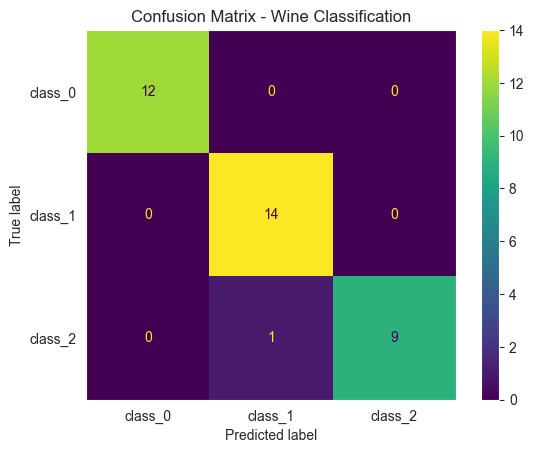

In [9]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=data.target_names)
plt.title("Confusion Matrix - Wine Classification")
plt.grid(False)
plt.show()
